In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)


In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png','ppm'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

ModuleNotFoundError: No module named 'joblib'

In [3]:
data_path = "/Users/simon/Documents/mines ales/Département 2iA/mission R&D/GTSRB/Final_Training/Images/data_test_3"
os.listdir(data_path)

['.DS_Store', 'panneau_50', 'vingt', 'trente']

In [4]:
base_name = 'mes panneaux'
width = 60
 
include = {'vingt','trente','panneau_50'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

panneau_50
vingt
trente


In [5]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
array_sans_derniere_colonne = []

# Parcourir chaque matrice dans l'array
for matrice in data['data']:
    # Supprimer la dernière colonne de chaque matrice
    matrice_sans_derniere_colonne = matrice[:, :, :-1]
    # Ajouter la matrice modifiée à la nouvelle liste
    array_sans_derniere_colonne.append(matrice_sans_derniere_colonne)

# Convertir la nouvelle liste en un array si nécessaire
array_sans_derniere_colonne = np.array(array_sans_derniere_colonne)

data['data']=array_sans_derniere_colonne
print(data)

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

{'description': 'resized (60x60)animal images in rgb', 'label': ['pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pann

Counter({'pannea': 2250, 'v': 205, 'tr': 2136})

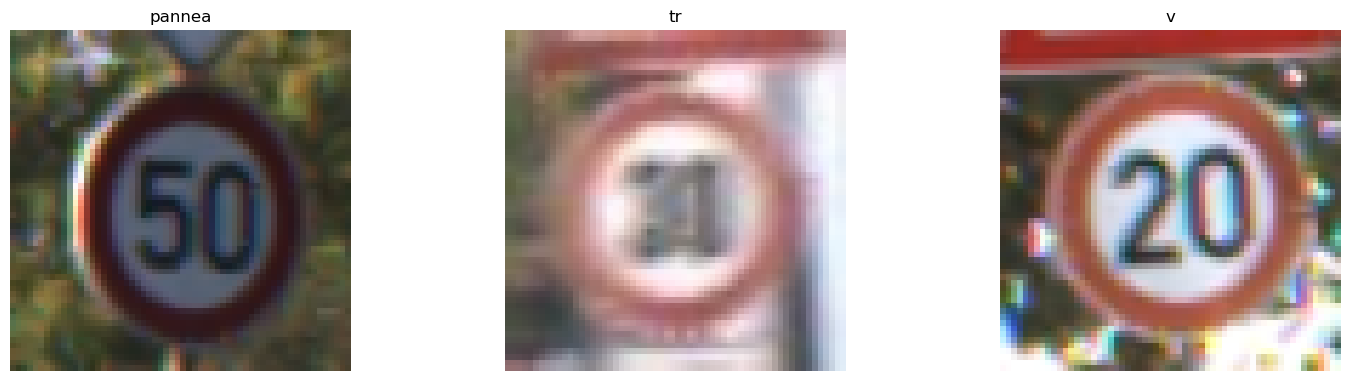

In [19]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [7]:
X = np.array(data['data'])
y = np.array(data['label'])

In [8]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

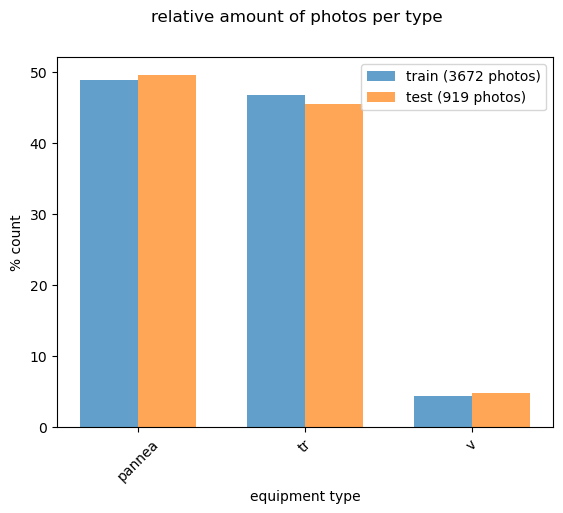

In [9]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [10]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [12]:
#from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(3672, 324)


In [13]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [14]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 100, 500],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_prepared, y_train)
best_score = grid_search.score(X_test_prepared, y_test)
best_params = grid_search.best_params_



In [16]:
print(best_score)

0.9390642002176278


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
foret_optimale=RandomForestClassifier(**best_params)
cv=KFold(10)
cross_val_score(foret_optimale,X_train_prepared,y_train,cv=cv)

array([0.94021739, 0.92934783, 0.92643052, 0.9346049 , 0.94822888,
       0.93188011, 0.9400545 , 0.90463215, 0.93188011, 0.94550409])

In [18]:
foret_optimale.fit(X_train_prepared,y_train)
y_predic=foret_optimale.predict(X_test_prepared)
#print(np.array(y_predic == y_test)[:25])
#print('')
print('Percentage correct: ', 100*np.sum(y_predic == y_test)/len(y_test))

Percentage correct:  93.57997823721436
